In [ ]:
#Importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/telcom_data.xlsx')

In [ ]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [ ]:
new_df = df[['MSISDN/Number','Handset Type' , 'Avg RTT DL (ms)','Avg RTT UL (ms)',
             'TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)',
             'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']]

In [ ]:
new_df.head()

,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.0,5.0,NaN,NaN,23.0,44.0
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.0,5.0,NaN,NaN,16.0,26.0
2,3.376063e+10,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,6.0,9.0
3,3.375034e+10,undefined,NaN,NaN,NaN,NaN,44.0,44.0
4,3.369980e+10,Samsung Sm-G390F,NaN,NaN,NaN,NaN,6.0,9.0


**Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing with the mean or the mode of the corresponding variable)**



**Average TCP retransmission**

**Average RTT**

**Handset type**

**Average throughput**




In [ ]:
new_df.isnull().sum()

,0
MSISDN/Number,1066
Handset Type,572
Avg RTT DL (ms),27829
Avg RTT UL (ms),27812
TCP DL Retrans. Vol (Bytes),88146
TCP UL Retrans. Vol (Bytes),96649
Avg Bearer TP DL (kbps),1
Avg Bearer TP UL (kbps),1


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MSISDN/Number                150001 non-null  float64
 1   Handset Type                 149429 non-null  object 
 2   Avg RTT DL (ms)              122172 non-null  float64
 3   Avg RTT UL (ms)              122189 non-null  float64
 4   TCP DL Retrans. Vol (Bytes)  61855 non-null   float64
 5   TCP UL Retrans. Vol (Bytes)  53352 non-null   float64
 6   Avg Bearer TP DL (kbps)      150000 non-null  float64
 7   Avg Bearer TP UL (kbps)      150000 non-null  float64
dtypes: float64(7), object(1)
memory usage: 9.2+ MB


**Handling missing values and replacing with mean for numerical columns and for categorical data applying mode to replace missing values**

In [ ]:
for col in new_df.columns:
  if new_df[col].dtypes == 'object':
    new_df[col] = new_df[col].fillna(new_df[col].mode()[0])
  else:
    new_df[col] = new_df[col].fillna(new_df[col].mean())


In [ ]:
new_df.isnull().sum()

,0
MSISDN/Number,0
Handset Type,0
Avg RTT DL (ms),0
Avg RTT UL (ms),0
TCP DL Retrans. Vol (Bytes),0
TCP UL Retrans. Vol (Bytes),0
Avg Bearer TP DL (kbps),0
Avg Bearer TP UL (kbps),0


**Checking Outliers for all columns**

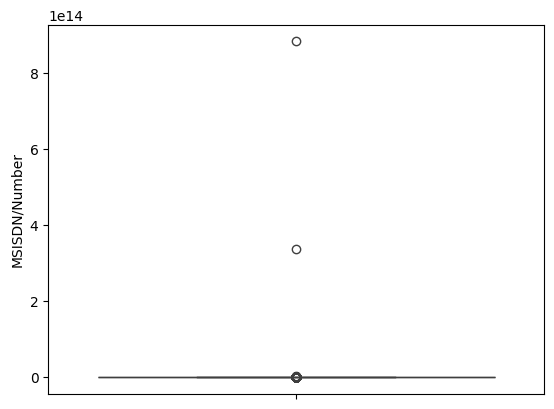

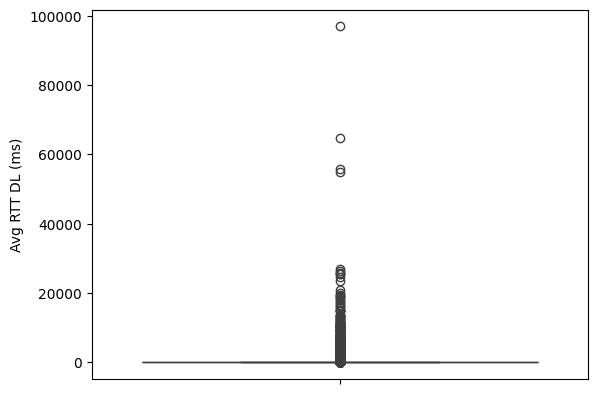

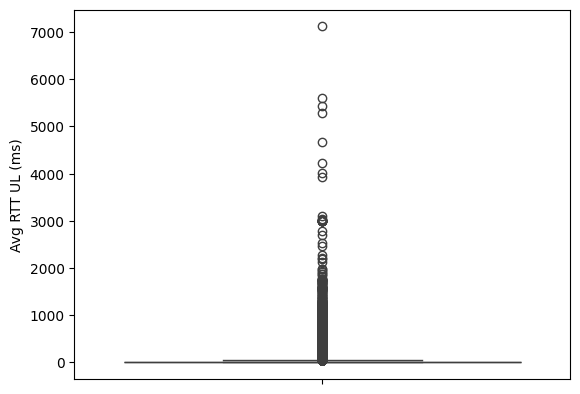

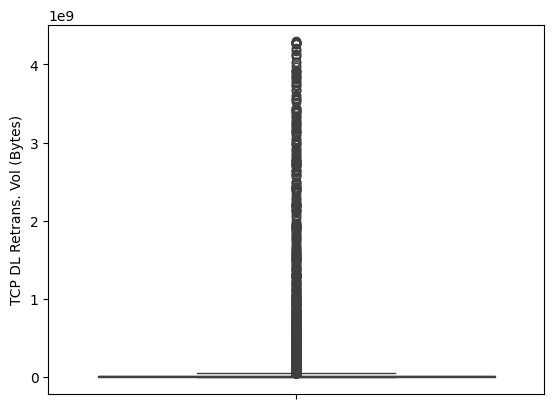

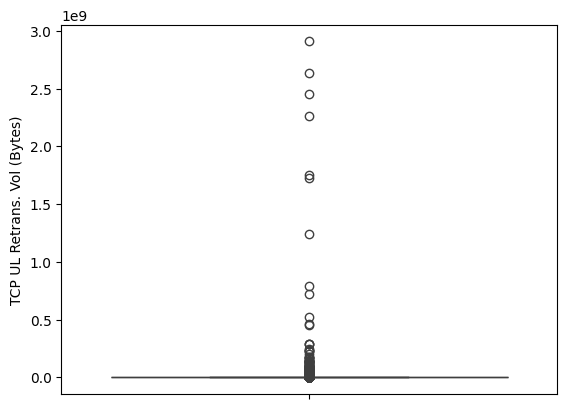

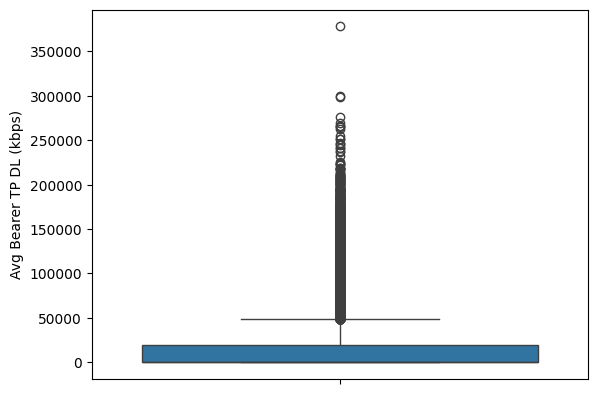

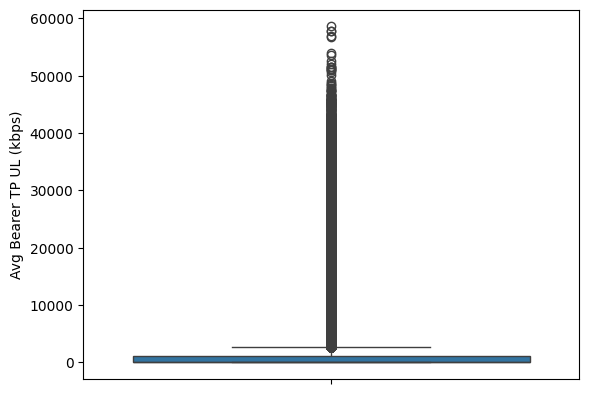

In [ ]:
for col in new_df.columns:
  if new_df[col].dtypes == 'object':
    continue
  else:
    sns.boxplot(new_df[col])
    plt.show()

**Outliers is handled by IQR method**

In [ ]:
for col in new_df.columns:
  if new_df[col].dtypes == 'object':
    continue
  else:
    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    iqr = Q3 -Q1
    lower_bond = Q1 - 1.5*iqr
    upper_bond =  Q3 + 1.5*iqr
    new_df[col] = np.where(new_df[col]< lower_bond, lower_bond, new_df[col])
    new_df[col] = np.where(new_df[col] > upper_bond, upper_bond, new_df[col])

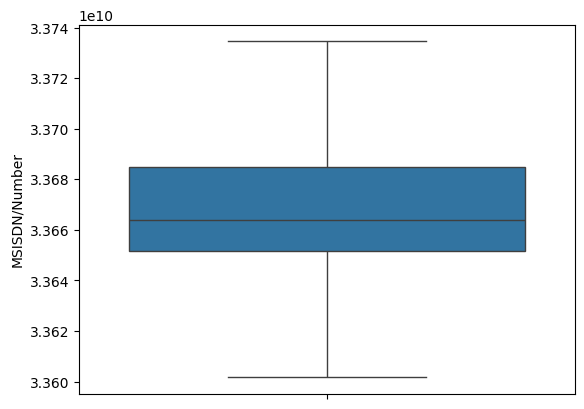

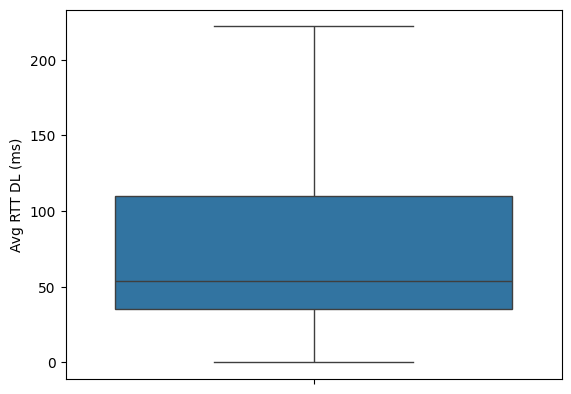

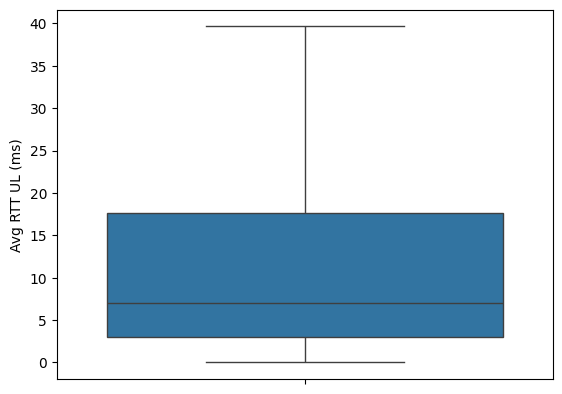

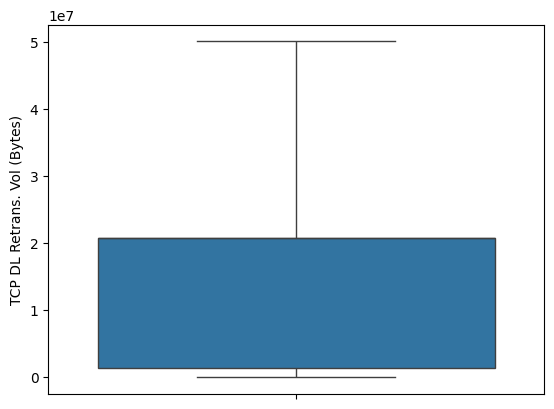

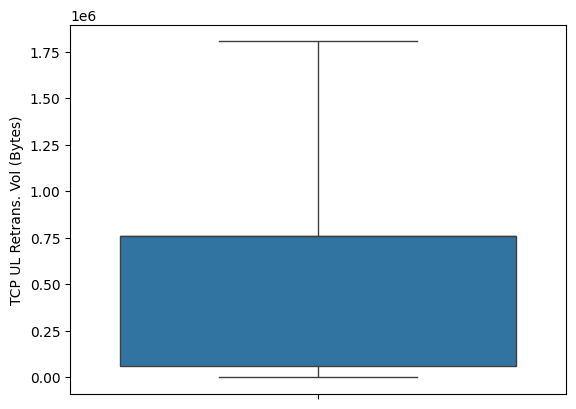

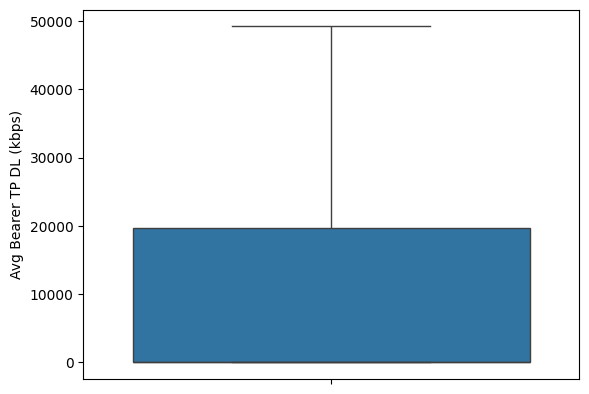

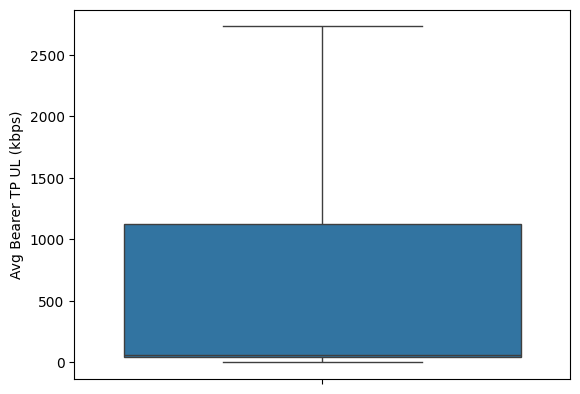

In [ ]:
for col in new_df.columns:
  if new_df[col].dtypes == 'object':
    continue
  else:
    sns.boxplot(new_df[col])
    plt.show()

We can clearly see in plots our outliers are removed and we have perfect distributed data

**Aggregate,the information per customer**

In [ ]:
#Calculating average TCP retransmission
new_df['Avg TCP Retrans'] = new_df[['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)']].mean(axis=1)

In [ ]:
#Calculating average RTT
new_df['Avg RTT'] = new_df[['Avg RTT DL (ms)','Avg RTT UL (ms)']].mean(axis=1)

In [ ]:
#Calculating average Throughput
new_df['Avg Throughput'] = new_df[['Avg Bearer TP DL (kbps)'  , 'Avg Bearer TP UL (kbps)']].mean(axis=1)

In [ ]:
#Aggregating per customer
agg_df = new_df.groupby('MSISDN/Number').agg({
    'Avg TCP Retrans': 'mean',
    'Avg RTT': 'mean',
    'Handset Type': 'first',
    'Avg Throughput': 'mean'
}).reset_index()

In [ ]:
#Checking first 5 rows of our agg_df dataframe
agg_df.head()

,MSISDN/Number,Avg TCP Retrans,Avg RTT,Handset Type,Avg Throughput
0,3.360168e+10,7.922285e+06,37.818348,Samsung Galaxy A5 Sm-A520F,4898.004875
1,3.360171e+10,1.078479e+07,57.500000,Apple iPhone Se (A1723),35.000000
2,3.360171e+10,3.096170e+05,76.000000,Apple iPhone 6 (A1586),4896.000000
3,3.360171e+10,9.211635e+06,61.614647,Samsung Galaxy S8 Plus (Sm-G955F),12651.625000
4,3.360171e+10,1.078479e+07,17.000000,Apple iPhone 7 Plus (A1784),58.500000


**Task 3.2 - Compute & list 10 of the top, bottom, and most frequent:**

**3.2a TCP values in the dataset.**

**3.2b RTT values in the dataset.**

**3.2c Throughput values in the dataset.**



In [ ]:
#For our better understanding
agg_df['Avg TCP Retrans'] = np.log(agg_df['Avg TCP Retrans'])

In [ ]:
#Top 10 TCP values in the dataset
top_tcp = agg_df['Avg TCP Retrans'].nlargest(10).reset_index()
top_tcp

,index,Avg TCP Retrans
0,6300,17.070333
1,16227,17.070333
2,19164,17.070333
3,20679,17.070333
4,22145,17.070333
5,22874,17.070333
6,23124,17.070333
7,23189,17.070333
8,27166,17.070333
9,27922,17.070333


In [ ]:
#Bottom 10 TCP values in the dataset
bottom_tcp = agg_df['Avg TCP Retrans'].nsmallest(10).reset_index()
bottom_tcp

,index,Avg TCP Retrans
0,23208,3.881564
1,6095,4.158883
2,13282,4.204693
3,1913,4.269697
4,25599,4.477337
5,77836,4.494239
6,89131,4.510860
7,87029,4.548600
8,76347,4.644391
9,5283,4.658711


In [ ]:
#Frequent 10 TCP values in the datset
frequent_10_tcp_values = agg_df['Avg TCP Retrans'].value_counts().reset_index()
frequent_10_tcp_values.columns = ['Avg TCP Retrans', 'Count']
frequent_10_tcp_values.head(10)

,Avg TCP Retrans,Count
0,16.193647,47144
1,16.157855,301
2,16.157857,147
3,12.849227,123
4,17.070333,120
5,12.850973,68
6,12.847598,67
7,16.157856,65
8,16.175911,65
9,12.847527,61


In [ ]:
#Top 10 RTT values in the dataset
top_rtt = agg_df['Avg RTT'].nlargest(10).reset_index()
top_rtt

,index,Avg RTT
0,1305,130.823236
1,1443,130.823236
2,1449,130.823236
3,1939,130.823236
4,2620,130.823236
5,2951,130.823236
6,3365,130.823236
7,3458,130.823236
8,3462,130.823236
9,3520,130.823236


In [ ]:
#Bottom 10 RTT values in the dataset
bottom_rtt = agg_df['Avg RTT'].nsmallest(10).reset_index()
bottom_rtt

,index,Avg RTT
0,28878,0.0
1,44748,0.0
2,39066,1.0
3,83396,2.0
4,36039,2.5
5,69662,3.0
6,21980,4.0
7,3882,4.5
8,74434,4.5
9,17863,5.0


In [ ]:
#Frequent 10 RTT values in the dataset
frequent_10_rtt_values = agg_df['Avg RTT'].value_counts().reset_index()
frequent_10_rtt_values.columns = ['Avg RTT', 'Count']
frequent_10_rtt_values.head(10)

,Avg RTT,Count
0,63.729294,18515
1,14.500000,2950
2,19.500000,2367
3,19.000000,1639
4,20.000000,1583
5,15.000000,1577
6,14.000000,1456
7,24.500000,1308
8,20.500000,1207
9,15.500000,1190


In [ ]:
#Top 10 THROUGHPUT values in the dataset
top_throughput = agg_df['Avg Throughput'].nlargest(10).reset_index()
top_throughput

,index,Avg Throughput
0,37838,141965.50
1,49595,132862.00
2,60763,132588.25
3,52830,127475.00
4,14564,119491.00
5,10359,117682.50
6,104697,115491.00
7,27722,114151.50
8,92374,113667.00
9,98280,113252.50


In [ ]:
#Bottom 10 THROUGHPUT values in the dataset
bottom_throughput = agg_df['Avg Throughput'].drop_duplicates()
bottom_throughput = bottom_throughput.nsmallest(10).reset_index()
bottom_throughput

,index,Avg Throughput
0,857,0.000000
1,7241,0.250000
2,230,0.500000
3,229,1.000000
4,2264,1.500000
5,71936,1.750000
6,35025,1.833333
7,1508,2.000000
8,2273,2.500000
9,2064,3.000000


In [ ]:
#Frequent 10 THROUGHPUT values in the dataset
frequent_10_throughput_values  = agg_df['Avg Throughput'].value_counts().reset_index()
frequent_10_throughput_values.columns = ['Avg Throughput', 'Count']
frequent_10_throughput_values.head(10)

,Avg Throughput,Count
0,7.5,2872
1,31.5,2138
2,48.5,1094
3,45.0,1062
4,49.0,1025
5,48.0,938
6,49.5,918
7,44.5,881
8,45.5,864
9,47.5,856


**Task 3.3 - Compute & report:**

**3.3d The distribution of the average throughput per handset type and provide interpretation for your findings.**

In [ ]:
distribution_throughput_per_handset = agg_df.groupby('Handset Type')['Avg Throughput'].mean().reset_index()
distribution_throughput_per_handset

,Handset Type,Avg Throughput
0,A-Link Telecom I. Cubot A5,11755.000000
1,A-Link Telecom I. Cubot Note Plus,3349.500000
2,A-Link Telecom I. Cubot Note S,4468.500000
3,A-Link Telecom I. Cubot Nova,28108.500000
4,A-Link Telecom I. Cubot Power,34734.000000
...,...,...
1389,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,29.000000
1390,Zyxel Communicat. Lte7460,30978.000000
1391,Zyxel Communicat. Sbg3600,48675.500000
1392,Zyxel Communicat. Zyxel Wah7706,1086.500000


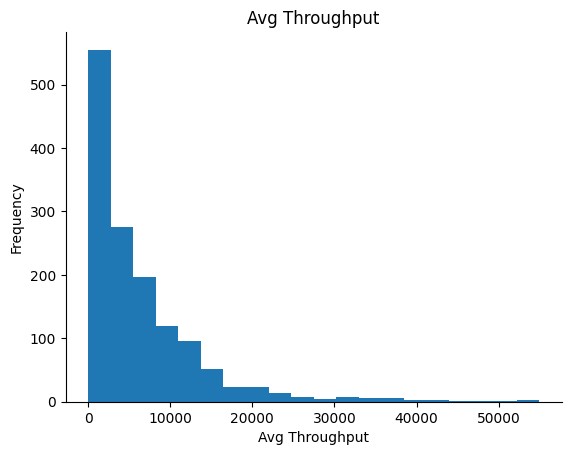

In [ ]:
from matplotlib import pyplot as plt
distribution_throughput_per_handset['Avg Throughput'].plot(kind='hist', bins=20, title='Avg Throughput')
plt.xlabel('Avg Throughput')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Observation**

**Higher Throughput:** Handset types with higher average throughput are likely providing better performance.

**Lower Throughput:** Handset types with lower average throughput may indicate poorer performance or limitations.

* After analyzing the graph we can clearly see that, Large No. of Handset with having low avg throughput.

* With having medium avg throuput handset is present in descent amount.

* The handset which is having very high throughput is present very less number.

Overall we can say that a large part of customers are using lower throughput handset



**3.3e The average TCP retransmission view per handset type and provide interpretation for your findings.**

In [ ]:
avg_tcp_retrans_per_handset = agg_df.groupby('Handset Type')['Avg TCP Retrans'].mean().reset_index()
avg_tcp_retrans_per_handset

,Handset Type,Avg TCP Retrans
0,A-Link Telecom I. Cubot A5,16.193647
1,A-Link Telecom I. Cubot Note Plus,12.638201
2,A-Link Telecom I. Cubot Note S,16.845928
3,A-Link Telecom I. Cubot Nova,11.135829
4,A-Link Telecom I. Cubot Power,8.299162
...,...,...
1389,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,14.522310
1390,Zyxel Communicat. Lte7460,16.842658
1391,Zyxel Communicat. Sbg3600,17.101801
1392,Zyxel Communicat. Zyxel Wah7706,12.847630


In [ ]:
avg_tcp_retrans_per_handset.sort_values(by='Avg TCP Retrans', ascending=False)

,Handset Type,Avg TCP Retrans
324,Huawei Bln-Al10,18.918952
142,Asustek Asus Zenfone Selfie Zd551Kl,18.177887
899,Samsung Galaxy J8 2018,17.873868
584,Lg Lg-H635,17.398949
348,Huawei E587 E587U-2 Turkcell Vinnwifi E587,17.266853
...,...,...
759,Oppo A37F,7.080447
549,Lenovo Moto X Play,6.811795
233,Gotron (Hk) Elec. Armor X,6.620073
915,Samsung Galaxy Note 8 (Sm-N9500),5.342334


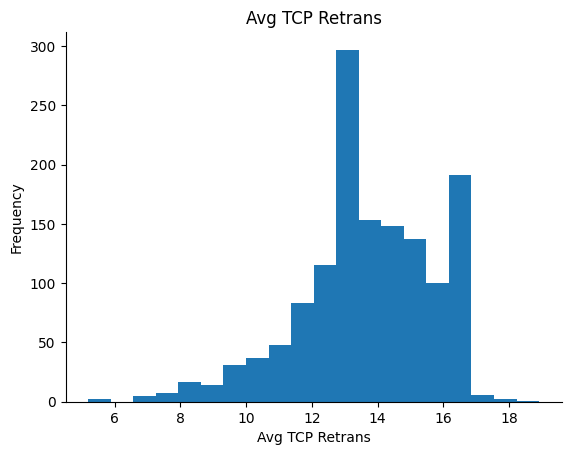

In [ ]:
avg_tcp_retrans_per_handset['Avg TCP Retrans'].plot(kind='hist', bins=20, title='Avg TCP Retrans')
plt.xlabel('Avg TCP Retrans')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Observation**

**Higher Values:** Handset types with higher average retransmissions might indicate poorer network performance or less efficient handling of TCP retransmissions.

**Lower Values:** Handset types with lower averages might indicate better network performance or more efficient devices.

Overall, Very large number of handset have medium average that indicate descent performance of the device

**Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)**

In [ ]:
#Selecting only relevant columns
experience_metrics = agg_df[['Avg TCP Retrans', 'Avg RTT', 'Avg Throughput']]

In [ ]:
#Standardzing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
experience_metrics_scaled = scaler.fit_transform(experience_metrics)

In [ ]:
#Performing KMeans clustering with (k=3)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
agg_df['Clusters'] = kmeans.fit_predict(experience_metrics_scaled)

In [ ]:
agg_df.head()

,MSISDN/Number,Avg TCP Retrans,Avg RTT,Handset Type,Avg Throughput,Clusters
0,3.360168e+10,15.885190,37.818348,Samsung Galaxy A5 Sm-A520F,4898.004875,1
1,3.360171e+10,16.193647,57.500000,Apple iPhone Se (A1723),35.000000,2
2,3.360171e+10,12.643091,76.000000,Apple iPhone 6 (A1586),4896.000000,2
3,3.360171e+10,16.035978,61.614647,Samsung Galaxy S8 Plus (Sm-G955F),12651.625000,2
4,3.360171e+10,16.193647,17.000000,Apple iPhone 7 Plus (A1784),58.500000,1


In [ ]:
agg_df['Clusters'].value_counts()

,count
Clusters,
0,73958
1,18860
2,14039


In [ ]:
#Center of the clusters
kmeans.cluster_centers_

array([[ 0.48075975, -0.06671692, -0.42024925],
       [-1.76028261,  0.29908065,  0.1132535 ],
       [-0.1666372 , -0.05074696,  2.06726212]])

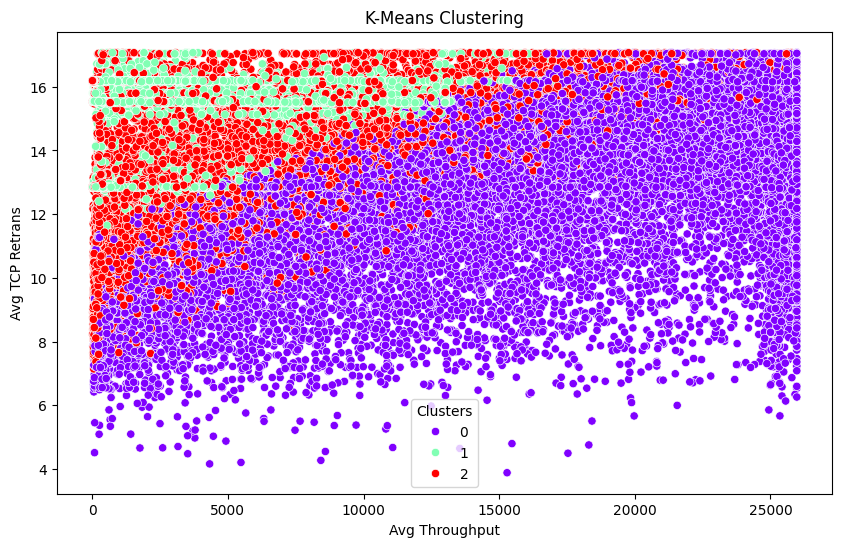

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = agg_df, x='Avg Throughput', y='Avg TCP Retrans', hue='Clusters', palette='rainbow')
plt.xlabel('Avg Throughput')
plt.ylabel("Avg TCP Retrans")
plt.title('K-Means Clustering')
plt.legend(title= 'Clusters')
plt.show()

**Observation**

**CLUSTER 0** - High Throughput with high TCP Retransmission

**Cluster 1** - High TCP Retransmission with low Throughput

**Cluster 2** - With Avg Throughput and High TCP Retransmission

**Interpretation**

**CLUSTER 0** - Cluster 0 is dominant group, comparing a large portion of the data points. It is associated with high network throughput, representing high-bandwidth applications or data transfer. As high TCP retransmission rates indicate congestion, packet loss or connectivity issues.

**CLUSTER 1** - Cluster 1 is relatively small group, comprising a limited number of data points. High TCP retransmission indicates network issues.

**CLUSTER 2** -Cluster 2 has medium amount of customers. Low Throughput indicated the data points in cluster 2 are associated with relatively low network bandwidth or data transfer rates. And high TCP retransmission rates suggesting network issue.